# Transfer Learning

**Exercise objetives**
- Use a pretrained neural network : Transfer learning

#### Transfer what?
We have seen that the convolutions are mathematical operation that detect specific patterns in input images and use them to classify the image. One could imagine that these patterns are not 100% specific to the task but to the input images. 

💡 Therefore, **why not using convolutions that have been learnt on other task** with the expectation that it will also work in other scenario?  We _transfer_ a CNN from one task to another => _transfer learning_. This has two advantages:
- taking less time to train
- benefiting from complex architecture that have been trained for state-of-the-art challenges. 

⚠️ Although convolutions may not be specific, the last layer is by design specific to the problem it was trained on! Therefore, this last layer is usually removed, replace by a layer that is design to the task. As this new last layer has random weight, it has to be retrained. This is called _fine-tunning_. 

#### VGG16
In this exercise, we will use the [VGG-16 Neural Network](https://neurohive.io/en/popular-networks/vgg16/), a well-known architecture that has been trained on ImageNet which is a very large database of images of different categories. In a nutshell, this architecture has already learnt kernels which are supposed to be good not only for the task it has been train on but maybe for other tasks. 

<center><img src="https://neurohive.io/wp-content/uploads/2018/11/vgg16-1-e1542731207177.png" width=400></center>

The idea is that first layers are not specialized for the particular task it has been trained on ; only the last ones are. Therefore, we will 
- load the existing VGG16 network
- remove the last fully connected layers
- replace them by new connected layers (whose weights are randomly set)
- and train these last layers on a specific classification task - here, separate types of flower. 

The underlying idea is that the first convolutional layers of VGG-16, that has already been trained, corresponds to filters that are able to extract meaning features from images. And you will only learn the last layers for your particular problem.

<hr>
<hr>

* 🤯 Tech companies and university labs have more computational resources than we do
* 😎 Let them train their super complex models on millions of images, and then re-use their kernels for our own CNNs!

🎯 **<u>Goal:</u>**
* ☄️ Use a **Pretrained Neural Network** $ \Leftrightarrow $ **Transfer learning**

## Google Colab Setup

Repeat the same process from the last challenge to upload your challenge folder and open your notebook:

1. access your [Google Drive](https://drive.google.com/)
2. go into the Colab Notebooks folder
3. drag and drop this challenge's folder into it
4. right-click the notebook file and select `Open with` $\rightarrow$ `Google Colaboratory`

Don' t forget to enable GPU acceleration!

`Runtime` $\rightarrow$ `Change runtime type` $\rightarrow$ `Hardware accelerator` $\rightarrow$ `GPU`

# 1. Data loading & Preprocessing

Adding the data to Google Drive.**

You can first download the data   `flowers-dataset`. Then you have to add them to your Google Drive in a folder called `Deep_learning_data` (for instance) and run the following code in the notebook.: 

```
from google.colab import drive
drive.mount('/content/drive/')
```

The previous code will ask you to go to a given webpage where you copy the link and past it in the Colab form that will appear. Do so to load the data on Google Colab.



❓ **Question** ❓  load your data

In [1]:
#YOUR CODE 
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pwd

/content


In [ ]:
 !ls

drive  sample_data


❓ **Question** ❓ Use the following method to create 
`X_train, y_train, X_val, y_val, X_test, y_test, num_classes` depending on the `loading_method` you have used

In [2]:
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm
import numpy as np
import os
from PIL import Image

def load_flowers_data(loading_method):
    if loading_method == 'colab':
        data_path = '/content/drive/Shareddrives/Clermont P#12-Promotion 2022 La Manufacture des Talents Michelin /8. BRIEFS/Brief: MedNet/PART1_TransfertLearning_TensorflowKeras/flowers-dataset/flowers'
    elif loading_method == 'direct':
        data_path = 'flowers/'
    classes = {'daisy':0, 'dandelion':1, 'rose':2}
    imgs = []
    labels = []
    for (cl, i) in classes.items():
        images_path = [elt for elt in os.listdir(os.path.join(data_path, cl)) if elt.find('.jpg')>0]
        for img in tqdm(images_path[:300]):
            path = os.path.join(data_path, cl, img)
            if os.path.exists(path):
                image = Image.open(path)
                image = image.resize((256, 256))
                imgs.append(np.array(image))
                labels.append(i)

    X = np.array(imgs)
    num_classes = len(set(labels))
    y = to_categorical(labels, num_classes)

    # Finally we shuffle:
    p = np.random.permutation(len(X))
    X, y = X[p], y[p]

    first_split = int(len(imgs) /6.)
    second_split = first_split + int(len(imgs) * 0.2)
    X_test, X_val, X_train = X[:first_split], X[first_split:second_split], X[second_split:]
    y_test, y_val, y_train = y[:first_split], y[first_split:second_split], y[second_split:]
    
    return X_train, y_train, X_val, y_val, X_test, y_test, num_classes

In [3]:
# CALL load_flowers_data 
X_train, y_train, X_val, y_val, X_test, y_test, num_classes = load_flowers_data('colab')

100%|██████████| 299/299 [00:05<00:00, 54.07it/s] 


❓ Check image shape and plot few of them

In [4]:
X_train[0].shape

(256, 256, 3)

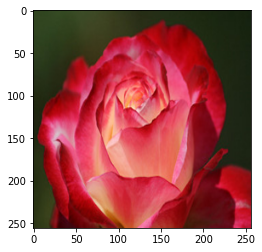

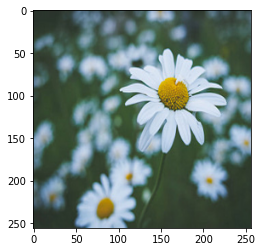

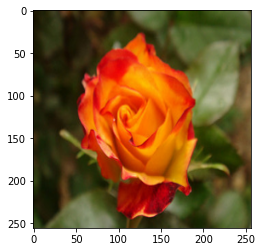

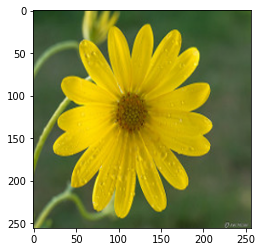

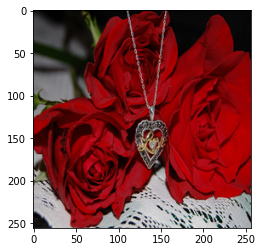

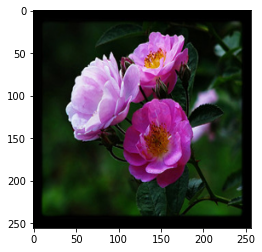

In [5]:
import matplotlib.pyplot as plt


for i in range(6):
  plt.imshow(X_train[i])
  plt.show()

## (1) What is a Pre-Trained Neural Network?

* Convolutions are mathematical operations designed to detect specific patterns in input images and use them to classify the images. 
* One could imagine that these patterns are not 100% specific to one task but to the input images. 

🚀 **Why not re-use these kernels - whose weights have already been optimized - somewhere else?** 
- The expectation is that the trained kernels could also help us perform another classification task.
- We are trying to ***transfer*** the knowledge of a trained CNN to a new classification task.


💪 Transfer Learning has two main advantages:
- It takes less time to train a pre-trained model since we are not going to update all the weights but only some of them
- You benefit from state-of-the-art architectures that have been trained on complex images. 

## (2) Introduction to  VGG16 

📚 ***Reading Section, no code***






In this exercise, we will use the <a href="https://neurohive.io/en/popular-networks/vgg16/">**`VGG-16 Neural Network`**</a>.

> VGG16 is a convolutional neural network model proposed by K. Simonyan and A. Zisserman from the University of Oxford in the paper “Very Deep Convolutional Networks for Large-Scale Image Recognition”. The model achieves 92.7% top-5 test accuracy in ImageNet, which is a dataset of over 14 million images belonging to 1000 classes. It was one of the famous model submitted to ILSVRC-2014. It makes the improvement over AlexNet by replacing large kernel-sized filters (11 and 5 in the first and second convolutional layer, respectively) with multiple 3×3 kernel-sized filters one after another. VGG16 was trained for weeks and was using NVIDIA Titan Black GPU’s.

VGG16 is a well-known architecture that has been trained on the <a href="https://www.image-net.org/">**`ImageNet dataset`**</a> which is a very large database of images which belong to different categories. 

👉 This architecture already learned which kernels are the best for extracting features from the images found in the `ImageNet dataset`.

👉 As you can see in the illustration, the VGG16 involves millions of parameters you don't want to retrain yourself.


<center><img src="https://neurohive.io/wp-content/uploads/2018/11/vgg16-1-e1542731207177.png" width=400></center>

❓ How does it work in practice ❓

* The first layers are not specialized for the particular task the VGG16 CNN was trained on
* Only the last dense layer is a "classification layers" that can be preceded with a couple of dense layers...  Therefore, we will: 
    1. Load the existing VGG16 network
    2. Remove the last fully connected layers
    3. Replace them with some new fully-connected layers (whose weights are randomly set)
    4. Train these last layers on a specific classification task. 

😃 Your role is to train only the last layers for your particular problem.

🤓 We will use <a href="https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/VGG16">**`tensorflow.keras.applications.VGG16`**</a>

<hr>

# 2. Home made model

First, let's check our performance on a home-made CNN model

❓ **Questions** ❓ 

- Build, compile and fit a CNN model adapted to the challenge.
- Compare performance with baseline 
- We recommand to use the following architecture

---
```python
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

model = Sequential()

# Notice this cool new layer that "pipe" your rescaling within the architecture
model.add(Rescaling(1./255, input_shape=(256,256,3)))

# Lets add 3 convolution layers, with relatively large kernel size as our pictures are quite big too
model.add(layers.Conv2D(16, kernel_size=10, activation='relu'))
model.add(layers.MaxPooling2D(3))

model.add(layers.Conv2D(32, kernel_size=8, activation="relu"))
model.add(layers.MaxPooling2D(3))

model.add(layers.Conv2D(32, kernel_size=6, activation="relu"))
model.add(layers.MaxPooling2D(3))

model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
```
---

In [8]:
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from keras.models import Sequential
from keras import layers


In [9]:
def initialize_model():
    model = Sequential()

    model.add(Rescaling(1./255, input_shape=(256,256,3)))

    model.add(layers.Conv2D(16, kernel_size=10, activation='relu'))
    model.add(layers.MaxPooling2D(3))

    model.add(layers.Conv2D(32, kernel_size=8, activation="relu"))
    model.add(layers.MaxPooling2D(3))

    model.add(layers.Conv2D(32, kernel_size=6, activation="relu"))
    model.add(layers.MaxPooling2D(3))

    model.add(layers.Flatten())
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))

    model.compile(optimizer = 'adam', loss= 'binary_crossentropy', metrics=['accuracy'])

    return model

model = initialize_model()

In [10]:
model_b = initialize_model()

In [11]:
model_b.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 247, 247, 16)      4816      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 82, 82, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 32)        32800     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 20, 20, 32)       

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

In [13]:
early_stop = EarlyStopping(min_delta=0.001, patience=10)

resutls = model_b.fit(X_train, y_train, batch_size=32, epochs=200, validation_data=(X_val, y_val), callbacks=[early_stop])

Epoch 1/200
18/18 [==============================] - 12s 95ms/step - loss: 0.5998 - accuracy: 0.4536 - val_loss: 0.5956 - val_accuracy: 0.4246
Epoch 2/200
18/18 [==============================] - 1s 37ms/step - loss: 0.5239 - accuracy: 0.5517 - val_loss: 0.5831 - val_accuracy: 0.5140
Epoch 3/200
18/18 [==============================] - 1s 37ms/step - loss: 0.5129 - accuracy: 0.5587 - val_loss: 0.5703 - val_accuracy: 0.4693
Epoch 4/200
18/18 [==============================] - 1s 47ms/step - loss: 0.4956 - accuracy: 0.6025 - val_loss: 0.5438 - val_accuracy: 0.5531
Epoch 5/200
18/18 [==============================] - 1s 48ms/step - loss: 0.4843 - accuracy: 0.6270 - val_loss: 0.5847 - val_accuracy: 0.5587
Epoch 6/200
18/18 [==============================] - 1s 43ms/step - loss: 0.5270 - accuracy: 0.5902 - val_loss: 0.5866 - val_accuracy: 0.5196
Epoch 7/200
18/18 [==============================] - 1s 37ms/step - loss: 0.4620 - accuracy: 0.6795 - val_loss: 0.5508 - val_accuracy: 0.5754
Epoch

In [15]:
evaluate = model_b.evaluate(X_test, y_test, batch_size=32)

5/5 [==============================] - 0s 18ms/step - loss: 0.7751 - accuracy: 0.7181


🥡 <b><u>Takeaways from building your own CNN</u></b>:
* On an "easy dataset" like the MNIST, it is now easy to reach a decent accuracy. But for a more complicated problem like classifying flowers, it already becomes more challenging. Take a few minutes to play with the following link before moving on to Transfer Learning
    * [PoloClub/CNN-Explainer](https://poloclub.github.io/cnn-explainer/)

# 3. Transfer learning = Pre-entrained CNN

As we said in the beginning, tech companies and university labs have more computational resources than we do.

🔥 The [**Visual Geometry Group**](https://www.robots.ox.ac.uk/~vgg/data/) *(Oxford University, Department of Science and Engineering)* became famous for some of their **Very Deep Convolutional Neural Networks**: the [**VGG16**](https://www.robots.ox.ac.uk/~vgg/research/very_deep/)

Take 7 minutes of your time to watch this incredible video of Convolutional Layers created by Dimitri Dmitriev.

* 📺 **[VGG16 Neural Network Visualization](https://www.youtube.com/watch?v=RNnKtNrsrmg)**


## 3.1 Load VGG16 model


❓ **Question** ❓ Write a first function `load_model()` that loads the pretrained VGG-16 model from `tensorflow.keras.applications.vgg16`. Especially, look at the [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16) to load the model where:
- the `weights` have been learnt on `imagenet`
- the `input_shape` corresponds to the input shape of any of your images - you have to resize them in case they are not of the same size
- the `include_top` argument is set to `False` in order not to load the fully-connected layers of the VGG-16 without the last layer which was specifically trained on `imagenet`

❗ **Remark** ❗ Do not change the default value of the other arguments

In [16]:
import tensorflow as tf

def load_model():
  VGG16_MODEL=tf.keras.applications.VGG16(input_shape=(256,256,3),
                                               include_top=False,
                                               weights='imagenet')
  return VGG16_MODEL
    

❓ **Question** ❓ Look at the architecture of the model thanks to the summary method

In [17]:
model = load_model()

58889256/58889256 [==============================] - 3s 0us/step


In [18]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [19]:
model.layers[0]

<img src="https://neurohive.io/wp-content/uploads/2018/11/vgg16-1-e1542731207177.png">

Impressive, right? Two things to notice:
- It ends with a convolution layer (namely a maxpooling layer that is the layer that follows a convolution). The flattening of the output and the fully connected layers are not here yet! We need to add them !
- There are more than 14.000.000 parameters, which is a lot. We could fine-tune them, meaning update them as we will update the last layers weights, but it will take a lot of time. For that reason, we will inform the model that the layers until the flattening are non-trainable.

❓ **Question** ❓ Write a first function that takes the previous model as input the set the first layers to be non-trainable, by applying `model.trainable = False`. Then check-out the summary of the model to see that now, the parameters are `non-trainable`



In [20]:
def set_nontrainable_layers(model):
    # Set the first layers to be untrainable
    model.trainable = False
    
    return model

In [21]:
model = set_nontrainable_layers(model)

In [22]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

❓ **Question** ❓ We will write a function that adds flattening and dense layers after the first convolutional layers. To do so, cannot directly use the classic `layers.Sequential()` instantiation.

For that reason, we will see another one here. The idea is that we define each layer (or group of layers) separately. Then, we concatenate them. See this example : 

---
```python
base_model = load_model()
base_model = set_nontrainable_layers(base_model)
flattening_layer = layers.Flatten()
dense_layer = layers.Dense(SOME_NUMBER_1, activation='relu')
prediction_layer = layers.Dense(SOME_NUMBER_2, activation='APPROPRIATE_ACTIVATION')

model = tf.keras.Sequential([
  base_model,
  flattening_layer,
  dense_layer,
  prediction_layer
])

```
---
The first line loads a group of layer which is the previous VGG-16 model. Then, we set this layers to be non-tranable. Then, we can instantiate as many layers as we want.

Finally, we use the `Sequential` with the sequence of layers that will correspond to our overall neural network. 

Replicate the following steps by adding a flattening and two dense layers (the first with 500 neurons) to the previous VGG-16 model.

In [23]:

def add_last_layers(model):
    '''Take a pre-trained model, set its parameters as non-trainables, and add additional trainable layers on top'''  
    base_model = load_model()
    base_model = set_nontrainable_layers(base_model)
    flattening_layer = layers.Flatten()
    dense_layer = layers.Dense(500, activation='relu')
    prediction_layer = layers.Dense(3, activation='softmax')

    model = tf.keras.Sequential([
      base_model,
      flattening_layer,
      dense_layer,
      prediction_layer])
    return model

❓ **Question** ❓ Now look at the layers and parameters of your model. Note that there is a distinction, at the end, between the trainable and non-trainable parameters

In [24]:
model = add_last_layers(model)

In [25]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 32768)             0         
                                                                 
 dense_4 (Dense)             (None, 500)               16384500  
                                                                 
 dense_5 (Dense)             (None, 3)                 1503      
                                                                 
Total params: 31,100,691
Trainable params: 16,386,003
Non-trainable params: 14,714,688
_________________________________________________________________


❓ **Question** ❓ Write a function that build (and compile) your model - we advise Adam with `learning_rate=1e-4`. 

In [26]:
from tensorflow.keras import optimizers

def build_model():

  base_model=tf.keras.applications.VGG16(input_shape=(256,256,3),
                                               include_top=False,
                                               weights='imagenet')
  
  base_model.trainable = False
  
  flattening_layer = layers.Flatten()
  dense_layer = layers.Dense(500, activation='relu')
  prediction_layer = layers.Dense(3, activation='softmax')

  model = tf.keras.Sequential([
    base_model,
    flattening_layer,
    dense_layer,
    prediction_layer])
  
  model.compile(optimizer = 'adam', loss= 'binary_crossentropy', metrics=['accuracy'])

  return model

In [27]:
model_f = build_model()

In [28]:
model_f.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 32768)             0         
                                                                 
 dense_6 (Dense)             (None, 500)               16384500  
                                                                 
 dense_7 (Dense)             (None, 3)                 1503      
                                                                 
Total params: 31,100,691
Trainable params: 16,386,003
Non-trainable params: 14,714,688
_________________________________________________________________


## 3.2 Back to the data

The VGG16 model was trained on images which were preprocessed in a specific way. This is the reason why we did not normalized them earlier.

❓ **Question** ❓ Apply this processing to the original (non-normalized) images here using the method `preprocess_input` that you can import from `tensorflow.keras.applications.vgg16`. See [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/preprocess_input).

In [29]:
from tensorflow.keras.applications.vgg16 import preprocess_input

In [30]:
X_train_norm = tf.keras.applications.vgg16.preprocess_input(X_train, data_format=None)

In [31]:
X_val_norm = tf.keras.applications.vgg16.preprocess_input(X_val, data_format=None)

In [32]:
X_train_norm[0].shape

(256, 256, 3)

## 3.3 Fit the model

❓ **Question** ❓ Now estimate the model, with an early stopping criterion on the validation accuracy - here, the validation data are provided, therefore use `validation_data` instead of `validation_split`.

❗ **Remark** ❗ Store the results in a `history` variable

In [33]:
history = model_f.fit(X_train_norm, y_train, batch_size=32,epochs=200, validation_data=(X_val_norm, y_val),callbacks=[early_stop] )

Epoch 1/200
18/18 [==============================] - 13s 490ms/step - loss: 8.3033 - accuracy: 0.7723 - val_loss: 1.8897 - val_accuracy: 0.8715
Epoch 2/200
18/18 [==============================] - 4s 202ms/step - loss: 0.2148 - accuracy: 0.9860 - val_loss: 1.1418 - val_accuracy: 0.8939
Epoch 3/200
18/18 [==============================] - 4s 229ms/step - loss: 0.0528 - accuracy: 0.9982 - val_loss: 1.1865 - val_accuracy: 0.8939
Epoch 4/200
18/18 [==============================] - 4s 233ms/step - loss: 0.0217 - accuracy: 0.9982 - val_loss: 1.2225 - val_accuracy: 0.8939
Epoch 5/200
18/18 [==============================] - 4s 231ms/step - loss: 0.0087 - accuracy: 1.0000 - val_loss: 1.2961 - val_accuracy: 0.8939
Epoch 6/200
18/18 [==============================] - 4s 232ms/step - loss: 6.3371e-06 - accuracy: 1.0000 - val_loss: 1.2904 - val_accuracy: 0.8994
Epoch 7/200
18/18 [==============================] - 4s 237ms/step - loss: 6.0710e-06 - accuracy: 1.0000 - val_loss: 1.2879 - val_accurac

❓ **Question** ❓ Plot the accuracy for the test and validation set using the usual function below

In [34]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    #ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    #ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f86be506880>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f86be2bc280>)

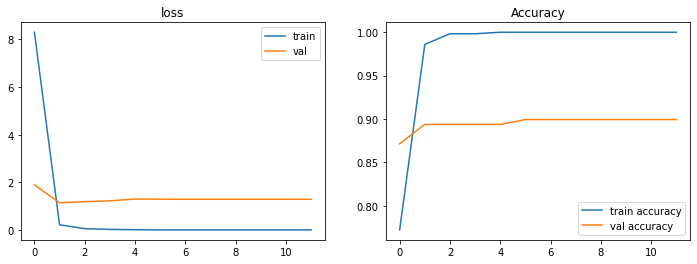

In [35]:
plot_history(history)

❓ **Question** ❓ Evaluate the model accuracy on the test set. Did we improve?

In [36]:
X_test_norm = tf.keras.applications.vgg16.preprocess_input(X_test, data_format=None)

In [37]:
evaluate_f = model_f.evaluate(X_test_norm, y_test, batch_size=32)

5/5 [==============================] - 3s 656ms/step - loss: 0.8932 - accuracy: 0.9329


# (OPTIONAL). Improve the model

You can here try to improve the model test accuracy. To do that, here are some options you can consider

1. **Unfreeze and finetune**: As per [Google tutorial](https://www.tensorflow.org/guide/keras/transfer_learning#fine-tuning) 
>_Once your model has converged on the new data, you can try to unfreeze all or part of the base model and retrain the whole model end-to-end with a very low learning rate. This is an optional last step that can potentially give you incremental improvements. It could also potentially lead to quick overfitting -- keep that in mind. It is critical to only do this step after the model with frozen layers has been trained to convergence. If you mix randomly-initialized trainable layers with trainable layers that hold pre-trained features, the randomly-initialized layers will cause very large gradient updates during training, which will destroy your pre-trained features. It's also critical to use a very low learning rate at this stage, because you are training a much larger model than in the first round of training, on a dataset that is typically very small. As a result, you are at risk of overfitting very quickly if you apply large weight updates. Here, you only want to readapt the pretrained weights in an incremental way._


1. Add **data augmentation** if your model is overfitting. 

1. If your model is not - unlikely here - , try a more complex model.

1. Perform precise **grid search** on all the hyper-parameters: learning_rate, batch_size, data augmentation etc...

1. **Change the base model** to more modern one (resnet, efficient net1. available in the keras library

1. Curate the data: maintaining a sane data set is one of the keys to success.

1. Obtain more data

## (6.1) Data augmentation

## 🏁 Congratulation 🏁 
Copy this notebook from your google drive into your local repo, and commit+push your progress on github. To find where this Colab notebook has been save, click on `File --> Locate in Drive`.